In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
data = pd.read_csv('data.csv')
data = data.drop(columns=['Unnamed: 0.1','Unnamed: 0'],axis=1)

path_df = pd.read_csv('path_history.csv')
path_df.columns = [i.strip() for i in list(path_df.keys())]
path_df['start_ship'] = [i.strip() for i in list(path_df['start_ship'])]
path_df['end_ship'] = [i.strip() for i in list(path_df['end_ship'])]


In [125]:
colonnes_qualitatives=[]
colonnes_quantitatives=[]
for col in data.columns : 
    try:
        pd.to_numeric(data[col])
        #colonnes_quantitatives.append(str(col))
    except :
        colonnes_qualitatives.append(col)
        print(col, 'est une variable qualitative')
for col in data.columns :
    if col not in colonnes_qualitatives:
        colonnes_quantitatives.append(col)

print(colonnes_quantitatives)
print(colonnes_qualitatives)

Unnamed: 1 est une variable qualitative
name est une variable qualitative
manufacturer est une variable qualitative
type est une variable qualitative
status est une variable qualitative
role est une variable qualitative
release_date est une variable qualitative
['cargo_capacity', 'mass', 'crew', 'price', 'price_ingame', 'scm', 'max', 'length', 'beam', 'height']
['Unnamed: 1', 'name', 'manufacturer', 'type', 'status', 'role', 'release_date']


In [151]:
import random

def choisir_mot():
    return random.choice(list(data['name']))

def aide_a_trouver_nom_vaisseau(nom_partiel):
    res=[]
    for nom in list(data['name']):
        if len(nom_partiel)<=len(nom):
            compatible=True
            for k in range(len(nom_partiel)):
                if nom_partiel[k]!=nom[k]:
                    compatible=False
            if compatible : 
                res.append(nom)
    return res

def verifier_ship(ship_secret, ship_guess):
    
    # Vérifie si la tentative existe dans le DataFrame
    if not ship_guess in list(data['name']):
        return "Ce vaisseau n'existe pas dans la base de données!"

    # Indique quand c'est la bonne réponse
    if ship_guess==ship_secret :
        return 'Bravo, vous avez trouvez le bon vaisseau!'

    L=list(data['name'])
    k = L.index(ship_guess)
    a = L.index(ship_secret)
    res=f"Ce n'est pas {ship_guess} Voici les résultats de chaque variables :"
    
    for col in data.columns : 
        if not col in ['Unnamed: 0','name']:
            res+='\n '
            res+='-pour la variable '
            res+=col
            res+=' '
            if col in colonnes_qualitatives :
                if data[col][k]!=data[col][a]:
                    res+="Ce n'est pas la bonne réponse"
                else:
                    res+="C'est la bonne réponse✅"
                    
            if col in colonnes_quantitatives : 
                if data[col][a]<data[col][k]:
                    res += f"La valeur de {col} est supérieure"
                elif data[col][a]> data[col][k]:
                    res += f"La valeur de {col} est inférieure"
                else:
                    res += "C'est la bonne réponse "
    print(res)
    return 0   

def stardle():
    
    print("Liste des vaisseaux disponibles:")
    for idx, name in enumerate(data['name']):
        print(f"{idx + 1}. {name}")
        
    ship_secret = choisir_mot()
    tentatives = 6
    print("Bienvenue dans Stardle! Devine le vaisseau")
    
    for _ in range(tentatives):
        
        tentative = input("Entrez votre tentative: ")
            
        # Vérifie si le mot existe
        resultat = verifier_ship(ship_secret,ship_guess=tentative)
        if resultat == "Ce vaisseau n'existe pas dans la base de données!":
            print(resultat)
            continue
            
        print(resultat)
        
        #if all(car == "✅" for car in resultat if car in ["✅", "🟡", "❌"]):
        if resultat!=0:
            print(f"Félicitations! Vous avez trouvé le vaisseau! Le vaisseau était: {ship_secret}")
            break
    else:
        print(f"Désolé, vous avez épuisé vos tentatives. Le vaisseau était: {ship_secret}")

In [128]:
"""def ecart(ship1, ship2):
    # Get indices for the ships
    idx1 = data[data['name'] == ship1].index[0]
    idx2 = data[data['name'] == ship2].index[0]
    
    ecart_mass = 0
    ecart_scm = 0
    ecart_vitesse = 0
    ecart_crew = 0
    ecart_length = 0
    ecart_height = 0
    ecart_beam = 0
    ecart_price = 0
    ecart_price_ingame = 0
    
    if ship1 == ship2:
        return 0
    else:
        # Calculer l'écart basé sur les colonnes quantitatives
        ecart_total = 0
        for col in colonnes_quantitatives:
            if col == 'cargo_capacity':
                ecart_mass = data.loc[idx1, col] - data.loc[idx2, col]
            elif col == 'mass':
                ecart_mass = data.loc[idx1, col] - data.loc[idx2, col]
            elif col == 'scm':
                ecart_scm = data.loc[idx1, col] - data.loc[idx2, col]
            elif col == 'max':  # Changed from max_speed to max as per your DataFrame columns
                ecart_vitesse = data.loc[idx1, col] - data.loc[idx2, col]
            elif col == 'crew':
                ecart_crew = data.loc[idx1, col] - data.loc[idx2, col]
            elif col == 'length':
                ecart_length = data.loc[idx1, col] - data.loc[idx2, col]
            elif col == 'height':
                ecart_height = data.loc[idx1, col] - data.loc[idx2, col]
            elif col == 'beam':
                ecart_beam = data.loc[idx1, col] - data.loc[idx2, col]
            elif col == 'price':
                ecart_price = data.loc[idx1, col] - data.loc[idx2, col]
            elif col == 'price_ingame':
                ecart_price_ingame = data.loc[idx1, col] - data.loc[idx2, col]
    return ecart_mass, ecart_scm, ecart_vitesse, ecart_crew, ecart_length, ecart_height, ecart_beam, ecart_price,ecart_price_ingame """
            
            


"def ecart(ship1, ship2):\n    # Get indices for the ships\n    idx1 = data[data['name'] == ship1].index[0]\n    idx2 = data[data['name'] == ship2].index[0]\n    \n    ecart_mass = 0\n    ecart_scm = 0\n    ecart_vitesse = 0\n    ecart_crew = 0\n    ecart_length = 0\n    ecart_height = 0\n    ecart_beam = 0\n    ecart_price = 0\n    ecart_price_ingame = 0\n    \n    if ship1 == ship2:\n        return 0\n    else:\n        # Calculer l'écart basé sur les colonnes quantitatives\n        ecart_total = 0\n        for col in colonnes_quantitatives:\n            if col == 'cargo_capacity':\n                ecart_mass = data.loc[idx1, col] - data.loc[idx2, col]\n            elif col == 'mass':\n                ecart_mass = data.loc[idx1, col] - data.loc[idx2, col]\n            elif col == 'scm':\n                ecart_scm = data.loc[idx1, col] - data.loc[idx2, col]\n            elif col == 'max':  # Changed from max_speed to max as per your DataFrame columns\n                ecart_vitesse = d

In [129]:
def extract(ship1, ship2):
    """
    Extrait tous les vaisseaux compris entre deux vaisseaux dans le DataFrame
    
    Args:
        ship1 (str): Nom du premier vaisseau
        ship2 (str): Nom du deuxième vaisseau
    
    Returns:
        DataFrame: DataFrame contenant tous les vaisseaux entre ship1 et ship2 inclus
    """
    # Vérifier que les deux vaisseaux existent
    if ship1 not in data['name'].values or ship2 not in data['name'].values:
        return "Un des vaisseaux n'existe pas dans la base de données"
    
    # Obtenir les indices des vaisseaux
    idx1 = data[data['name'] == ship1].index[0]
    idx2 = data[data['name'] == ship2].index[0]
    
    # S'assurer que idx1 est plus petit que idx2
    if idx1 > idx2:
        idx1, idx2 = idx2, idx1
    
    # Extraire le sous-DataFrame entre les deux indices
    vaisseaux_entre = data.iloc[idx1:idx2+1]
    
    return vaisseaux_entre

# Exemple d'utilisation :
result_df = extract('Cutlass Black', 'X1 Force')
result_df

,Unnamed: 1,name,cargo_capacity,mass,crew,manufacturer,type,status,role,price,release_date,price_ingame,scm,max,length,beam,height
47,Cutlass Black,Cutlass Black,46,246577.0,3,Drake Interplanetary,multi,flight-ready,{'0': 'Medium Freight'} ...,110.0,2014,2116800.0,215.0,1125.0,37.50,26.50,11.50
48,Cutlass Blue,Cutlass Blue,12,226700.0,3,Drake Interplanetary,combat,flight-ready,{'0': 'Interdiction'} ...,175.0,2020,3704400.0,215.0,1125.0,37.50,26.50,11.50
49,Cutlass Red,Cutlass Red,12,226700.0,2,Drake Interplanetary,support,flight-ready,{'0': 'Medical'} ...,135.0,2020,2857680.0,215.0,1125.0,37.50,26.50,11.50
50,Cutlass Steel,Cutlass Steel,0,246577.0,3,Drake Interplanetary,combat,flight-ready,{'0': 'Dropship'} ...,235.0,2021,3997350.0,200.0,1100.0,37.50,26.50,11.50
51,Cutter,Cutter,4,86877.0,1,Drake Interplanetary,transport,flight-ready,""" """"{'0': 'Starter' '1': 'Light Freight'} ...",45.0,2022,625040.0,180.0,1010.0,20.00,16.00,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Vanguard Warden,Vanguard Warden,0,244270.0,2,Aegis Dynamics,combat,flight-ready,{'0': 'Heavy Fighter'} ...,260.0,2016,10319400.0,215.0,1111.0,48.00,40.00,9.50
193,Vulcan,Vulcan,12,625330.0,3,Aegis Dynamics,multi,in-concept,""" """"{'0': 'Medium Repair' '1': 'Medium Refuel...",200.0,Unreleased,0.0,210.0,0.0,38.50,16.50,10.00
194,Vulture,Vulture,12,186103.0,1,Drake Interplanetary,industrial,flight-ready,{'0': 'Light Salvage'} ...,175.0,2023,2646000.0,200.0,1100.0,34.00,16.00,9.00
195,X1,X1,0,4730.0,1,Origin Jumpworks,exploration,flight-ready,{'0': 'Touring'} ...,40.0,2023,105840.0,207.0,569.0,1.55,5.19,1.87


In [130]:
def guess(ship1,ship2):
    """
    Compare deux vaisseaux et retourne une liste de résultats pour chaque variable
    """
    # Vérifier que les deux vaisseaux existent
    if ship1 not in data['name'].values or ship2 not in data['name'].values:
        return "Un des vaisseaux n'existe pas dans la base de données"
    
    # Obtenir les indices des vaisseaux
    idx1 = data[data['name'] == ship1].index[0]
    idx2 = data[data['name'] == ship2].index[0]
    
    # S'assurer que idx1 est plus petit que idx2
    if idx1 > idx2:
        idx1, idx2 = idx2, idx1
    
    # Comparer les vaisseaux
    colonnes = list(data.columns)
    res = {}
    for col in colonnes:
        if col in colonnes_qualitatives:
            if data.loc[idx1, col] == data.loc[idx2, col]:
                res[col] = True
            else: 
                res[col]= False
                
        elif col in colonnes_quantitatives:
            res[col] = data.loc[idx1, col] - data.loc[idx2, col]
    return res

guess('Mustang Delta','Mustang Alpha')

{'Unnamed: 1': False,
 'name': False,
 'cargo_capacity': np.int64(4),
 'mass': np.float64(-4542.0),
 'crew': np.int64(0),
 'manufacturer': True,
 'type': False,
 'status': True,
 'role': False,
 'price': np.float64(-35.0),
 'release_date': True,
 'price_ingame': np.float64(-585900.0),
 'scm': np.float64(0.0),
 'max': np.float64(0.0),
 'length': np.float64(0.0),
 'beam': np.float64(0.0),
 'height': np.float64(0.0)}

In [131]:
def find_different_ships_by_specs(ship_reference,specs=['role', 'manufacturer', 'status', 'type','release_date']):
    """
    Extrait tous les vaisseaux ayant les mêmes caractéristiques spécifiques qu'un vaisseau de référence
    
    Args:
        ship_reference (str): Nom du vaisseau de référence
    
    Returns:
        DataFrame: DataFrame contenant tous les vaisseaux ayant les mêmes role, manufacturer, status et type
    """
    # Vérifier que le vaisseau existe
    if ship_reference not in data['name'].values:
        return "Ce vaisseau n'existe pas dans la base de données"
    
    # Obtenir l'index du vaisseau de référence
    idx_ref = data[data['name'] == ship_reference].index[0]
    
    # Créer un masque pour les caractéristiques spécifiques
    masque = pd.Series(True, index=data.index)
    for col in specs:
        masque &= (data[col] != data.loc[idx_ref, col])
    
    # Appliquer le masque pour obtenir les vaisseaux similaires
    vaisseaux_similaires = data[masque]
    
    return vaisseaux_similaires




In [132]:
class ShipTreeNode:
    def __init__(self, ship_data):
        self.ship_data = ship_data
        self.left = None
        self.right = None
        self.name = ship_data['name']
        self.crew = ship_data['crew']
        self.manufacturer = ship_data['manufacturer']
        self.role = ship_data['role']
        self.type = ship_data['type']
        self.status = ship_data['status']
        self.year = ship_data['release_date']

class ShipSearchTree:
    def __init__(self):
        self.root = None
        self.ship_nodes = {}
        self.distances_cache = {}
        self.paths_cache = {}
        self.path_usage = {}  
        self.paths_history = []  # Nouveau: historique des chemins parcourus

        
    def insert(self, ship_data):
        node = ShipTreeNode(ship_data)
        self.ship_nodes[ship_data['name']] = node
        
        if self.root is None:
            self.root = node
        else:
            self._insert_recursive(self.root, node)
            
    def _insert_recursive(self, current, node):
        if node.crew < current.crew:
            if current.left is None:
                current.left = node
            else:
                self._insert_recursive(current.left, node)
        else:
            if current.right is None:
                current.right = node
            else:
                self._insert_recursive(current.right, node)

    def calculate_distance(self, ship1_name, ship2_name):
        # Récupérer les noeuds des vaisseaux
        ship1 = self.ship_nodes[ship1_name]
        ship2 = self.ship_nodes[ship2_name]
        
        distance = 0
        
        # Distance basée sur l'équipage (normalisée)
        crew_diff = abs(ship1.crew - ship2.crew) / max(1, max(ship1.crew, ship2.crew))
        distance += crew_diff * 2
        
        # Pénalités pour les différences
        if ship1.manufacturer != ship2.manufacturer:
            distance += 1.0
        if ship1.type != ship2.type:
            distance += 1.0
        if ship1.role != ship2.role:
            distance += 1.0
        if ship1.status != ship2.status:
            distance += 1.0
        if ship1.crew != ship2.crew:
            distance += 1.0
        if ship1.year != ship2.year:
            distance += 1.0

        return distance

    def find_shortest_path(self, start_name, end_name):
        import heapq
        
        # Initialisation
        distances = {ship: float('inf') for ship in self.ship_nodes}
        distances[start_name] = 0
        pq = [(0, start_name, [start_name])]
        visited = set()
        
        while pq:
            current_distance, current_ship, path = heapq.heappop(pq)
            
            if current_ship == end_name:
                return path, current_distance
                
            if current_ship in visited:
                continue
                
            visited.add(current_ship)
            
            # Explorer les voisins
            for next_ship in self.ship_nodes:
                if next_ship not in visited:
                    distance = self.calculate_distance(current_ship, next_ship)
                    new_distance = current_distance + distance
                    
                    if new_distance < distances[next_ship]:
                        distances[next_ship] = new_distance
                        new_path = path + [next_ship]
                        heapq.heappush(pq, (new_distance, next_ship, new_path))
        
        return None, None

    def record_path_usage(self, path):
        """Enregistre l'utilisation des nœuds dans un chemin"""
        for i in range(len(path)-1):
            node1 = path[i]
            node2 = path[i+1]
            edge = tuple(sorted([node1, node2]))
            
            if edge not in self.path_usage:
                self.path_usage[edge] = 0
            self.path_usage[edge] += 1

    def save_path_history(self, path, total_distance):
        """Sauvegarde l'historique d'un chemin parcouru"""
        path_info = {
        'path': path,
        'distance': total_distance,
        'details': []
    }
    
        for i in range(len(path)):
            node = self.ship_nodes[path[i]]
            node_info = {
            'name': node.name,
            'manufacturer': node.manufacturer,
            'crew': node.crew,
            'role': node.role,
            'type': node.type,
            'status': node.status
            }
        
            if i < len(path) - 1:
                next_node = self.ship_nodes[path[i + 1]]
                distance = self.calculate_distance(node.name, next_node.name)
                node_info['distance_to_next'] = distance
        
            path_info['details'].append(node_info)
        
        self.paths_history.append(path_info)
        
        
# Utilisation :
def search_path(start_idx,end_idx):
    ship_tree = ShipSearchTree()
    
    # Insérer tous les vaisseaux
    for _, row in data.iterrows():
        ship_tree.insert(row)
        
    ships = list(data['name'].values)

    # Demander les vaisseaux de départ et d'arrivée
    path, total_distance = ship_tree.find_shortest_path(ships[start_idx], ships[end_idx])
    
    if path:
        print(f"\nChemin le plus court trouvé (distance totale: {total_distance:.2f}):")
        for i in range(len(path)):
            node = ship_tree.ship_nodes[path[i]]
            print(f"\n{node.name}:")
            
            if i < len(path) - 1:
                next_node = ship_tree.ship_nodes[path[i + 1]]
                dist = ship_tree.calculate_distance(node.name, next_node.name)
    else:
        print("\nAucun chemin trouvé entre ces vaisseaux.")
    
    return dist

def show_ship_paths():
    ship_tree = ShipSearchTree()
    for _, row in data.iterrows():
        ship_tree.insert(row)
    
    ships = list(ship_tree.ship_nodes.keys())
    all_paths = []  # Pour stocker tous les chemins

    for idx in range(len(ships)):
        for jdx in range(len(ships)):
            start_ship = data['name'][idx]
            end_ship = data['name'][jdx]
            
            nodes_path, total_distance = ship_tree.find_shortest_path(start_ship, end_ship)
            
            if nodes_path:
                # Enregistrer l'utilisation du chemin
                ship_tree.record_path_usage(nodes_path)
                # Sauvegarder l'historique du chemin
                ship_tree.save_path_history(nodes_path, total_distance)
                
                # Créer un dictionnaire avec les informations du chemin
                path_info = {
                    'start_ship': start_ship,
                    'end_ship': end_ship,
                    'path_length': len(nodes_path),
                    'total_distance': total_distance,
                    'complete_path': ' -> '.join(nodes_path)
                }
                all_paths.append(path_info)
                
                print(f"\nChemin de {start_ship} vers {end_ship} (distance: {total_distance:.2f}):")
                for i, node_name in enumerate(nodes_path):
                    node = ship_tree.ship_nodes[node_name]
                    print(f"\n{node.name}")
                    
                    if i < len(nodes_path) - 1:
                        next_node_name = nodes_path[i + 1]
                        next_node = ship_tree.ship_nodes[next_node_name]
                        dist = ship_tree.calculate_distance(node.name, next_node.name)
    
    # Sauvegarder l'historique dans un fichier CSV avec plus d'informations
    paths_df = pd.DataFrame(all_paths)
    paths_df.to_csv('detailed_paths_history.csv', index=False)
    print("\nHistorique détaillé des chemins sauvegardé dans 'detailed_paths_history.csv'")
    


In [146]:
def get_ship_distance(ship1, ship2):
    """
    Returns the distance between two ships from path_df
    
    Args:
        ship1 (str): Name of the first ship
        ship2 (str): Name of the second ship
        
    Returns:
        float: Distance between the ships, or None if not found
    """
    # Look up the distance in path_df
    result = path_df[(path_df['start_ship'] == ship1) & (path_df['end_ship'] == ship2)]
    
    if not result.empty:
        return result['total_distance'].values[0]
    else:
        # Check reverse direction if not found
        result = path_df[(path_df['start_ship'] == ship2) & (path_df['end_ship'] == ship1)]
        if not result.empty:
            return result['total_distance'].values[0]
        return None

# Example usage:
distance = get_ship_distance('Carrack', 'Aurora LX')
distance

np.float64(5.666666666666667)

In [161]:
def stardle_auto():
    """
    Version automatique de Stardle qui choisit intelligemment le prochain vaisseau
    en réduisant progressivement la distance au vaisseau mystère.
    
    Returns:
        tuple: (nombre de tentatives, liste des vaisseaux essayés)
    """
    
    ship_secret = choisir_mot()
    tentatives = 6
    visited_ships = []  # Changed from set to list to preserve order
    
    # Initialiser avec un vaisseau aléatoire
    current_ship = random.choice(list(data['name']))
    
    print("Stardle Auto - Recherche intelligente du vaisseau mystère")
    print(f"Démarrage avec le vaisseau: {current_ship}")
    
    for attempt in range(tentatives):
        print(f"\nTentative {attempt + 1}/{tentatives}")
        
        # Marquer le vaisseau comme visité
        visited_ships.append(current_ship)  # Append instead of add
        
        # Vérifier le vaisseau actuel
        resultat = verifier_ship(ship_secret, current_ship)
        if resultat == 'Bravo, vous avez trouvez le bon vaisseau!':
            print(f"\nVaisseau trouvé en {attempt + 1} tentatives!")
            return attempt + 1, visited_ships
            
        # Trouver les vaisseaux les plus proches non visités
        closest_ships = []
        idx_secret = data[data['name'] == ship_secret].index[0]
        
        for ship in data['name']:
            if ship not in visited_ships:
                idx_ship = data[data['name'] == ship].index[0]
                distance = get_ship_distance(ship, ship_secret)
                if distance is not None:  # Only add ships with valid distances
                    closest_ships.append((ship, distance))
        
        # Trier par distance et choisir le plus proche
        if closest_ships:
            closest_ships.sort(key=lambda x: x[1])
            current_ship = closest_ships[0][0]
            print(f"Prochain essai: {current_ship}")
        else:
            # Si aucun vaisseau valide n'est trouvé, choisir aléatoirement parmi les non visités
            available_ships = [ship for ship in data['name'] if ship not in visited_ships]
            if available_ships:
                current_ship = random.choice(available_ships)
                print(f"Prochain essai (aléatoire): {current_ship}")
            else:
                print("Plus de vaisseaux disponibles à essayer!")
                break
    
    print(f"\nÉchec - Le vaisseau mystère était: {ship_secret}")
    return tentatives + 1, visited_ships

# Example usage:
nb_tentatives, ships_used = stardle_auto()
print(f"\nNombre de tentatives: {nb_tentatives}")
print("Vaisseaux utilisés:")
for i, ship in enumerate(ships_used, 1):
    print(f"{i}. {ship}")

Stardle Auto - Recherche intelligente du vaisseau mystère
Démarrage avec le vaisseau: Pulse LX

Tentative 1/6
Ce n'est pas Pulse LX Voici les résultats de chaque variables :
 -pour la variable Unnamed: 1 Ce n'est pas la bonne réponse
 -pour la variable cargo_capacity La valeur de cargo_capacity est inférieure
 -pour la variable mass C'est la bonne réponse 
 -pour la variable crew La valeur de crew est inférieure
 -pour la variable manufacturer Ce n'est pas la bonne réponse
 -pour la variable type Ce n'est pas la bonne réponse
 -pour la variable status Ce n'est pas la bonne réponse
 -pour la variable role Ce n'est pas la bonne réponse
 -pour la variable price La valeur de price est inférieure
 -pour la variable release_date Ce n'est pas la bonne réponse
 -pour la variable price_ingame La valeur de price_ingame est supérieure
 -pour la variable scm La valeur de scm est supérieure
 -pour la variable max La valeur de max est inférieure
 -pour la variable length La valeur de length est infé

In [169]:
def run_multiple_stardle_auto(n_iterations):
    """
    Execute stardle_auto n times and collect statistics
    
    Returns:
        DataFrame: Contains results of all iterations
    """
    import pandas as pd
    
    # Lists to store results
    all_results = []
    
    for i in range(n_iterations):
        print(f"\nItération {i+1}/{n_iterations}")
        print("-" * 50)
        
        # Run stardle_auto
        nb_attempts, ships = stardle_auto()
        
        # Store results
        result = {
            'iteration': i+1,
            'nb_attempts': nb_attempts,
            'ships_used': ships,
            'secret_ship': ships[-1] if ships else None,  # Last ship is the secret one
            'path': ' -> '.join(ships)
        }
        all_results.append(result)
    
    # Convert to DataFrame
    results_df = pd.DataFrame(all_results)
    
    # Save results to CSV
    results_df.to_csv('stardle_auto_results.csv', index=False)
    
    # Print summary statistics
    print("\nRésultats finaux:")
    print(f"Nombre moyen de tentatives: {results_df['nb_attempts'].mean():.2f}")
    print(f"Minimum de tentatives: {results_df['nb_attempts'].min()}")
    print(f"Maximum de tentatives: {results_df['nb_attempts'].max()}")
    
    return results_df

# Run the analysis
results = run_multiple_stardle_auto(1000)
print("\nRésultats détaillés:")
print(results[['iteration', 'nb_attempts', 'path']])


Itération 1/1000
--------------------------------------------------
Stardle Auto - Recherche intelligente du vaisseau mystère
Démarrage avec le vaisseau: Cyclone RC

Tentative 1/6
Ce n'est pas Cyclone RC Voici les résultats de chaque variables :
 -pour la variable Unnamed: 1 Ce n'est pas la bonne réponse
 -pour la variable cargo_capacity C'est la bonne réponse 
 -pour la variable mass C'est la bonne réponse 
 -pour la variable crew C'est la bonne réponse 
 -pour la variable manufacturer Ce n'est pas la bonne réponse
 -pour la variable type Ce n'est pas la bonne réponse
 -pour la variable status Ce n'est pas la bonne réponse
 -pour la variable role C'est la bonne réponse✅
 -pour la variable price La valeur de price est supérieure
 -pour la variable release_date Ce n'est pas la bonne réponse
 -pour la variable price_ingame La valeur de price_ingame est supérieure
 -pour la variable scm La valeur de scm est inférieure
 -pour la variable max La valeur de max est inférieure
 -pour la varia

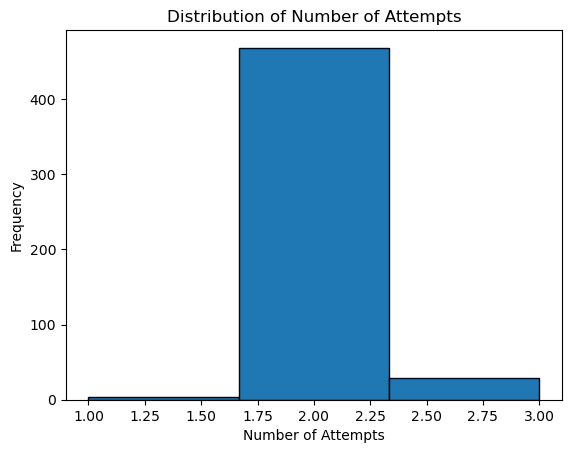

In [168]:
# Use the results DataFrame that's already defined
attempts = results['nb_attempts']

import matplotlib.pyplot as plt

plt.hist(attempts, bins=3, edgecolor='black')
plt.title('Distribution of Number of Attempts')
plt.xlabel('Number of Attempts')
plt.ylabel('Frequency')
plt.show()